In [4]:
import pandas as pd
import os as os

In [5]:
import getpass
user= (getpass.getuser())
print("Hello", user)

import glob
base='C:\\Users\\{}\\Dropbox\\CPLab'.format(user)
files = glob.glob(base+'\\all_data_mat_filtered\\*.mat')
savepath = base+'\\results\\'
print(files)

Hello Thomas
['C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230529_dk1_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230529_dk3_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230529_dk5_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230529_dk6_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230531_dk1_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230531_dk3_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230531_dk5_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230531_dk6_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230609_dk1_BW_nocontext_day1.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230609_dk3_BW_nocontext_day1.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230610_dk

In [7]:
compiled_data=pd.read_csv(os.path.join(savepath,'compiled_data.csv'))

In [8]:
import numpy as np
all_experiments=np.unique(compiled_data['experiment'])
print(all_experiments)

['BWcontext' 'BWnocontext' 'nocontext' 'nocontextday2' 'nocontextos2']


In [9]:
for i,experimenti in enumerate(compiled_data['experiment']):
  if experimenti=='nocontextday2':
    print(i)
    compiled_data.at[i,'experiment']='nocontext'
  elif experimenti=='nocontextos2':
    print(i)
    compiled_data.at[i,'experiment']='nocontext'

all_experiments=np.unique(compiled_data['experiment'])
print(all_experiments)

174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723


In [15]:
bands=['total','beta','gamma','theta']
events=['_power_pre_door','_power_post_door','_power_pre_odor','_power_post_odor']

all_data=pd.DataFrame(columns=['experiment','first 30 seconds power','event','mean','se'])
aon_data=compiled_data[compiled_data['channel'].str.contains('AON')]
vhp_data=compiled_data[compiled_data['channel'].str.contains('vHp')]

mean_data_aon=pd.DataFrame(columns=['experiment','first 30 seconds power','event','mean','se'])
mean_data_vhp=pd.DataFrame(columns=['experiment','first 30 seconds power','event','mean','se'])

total_dict={}
beta_dict={}
gamma_dict={}
theta_dict={}
for experimenti in all_experiments:
  small_data=compiled_data[compiled_data['experiment']==experimenti]
  small_data_aon=aon_data[aon_data['experiment']==experimenti]
  small_data_vhp=vhp_data[vhp_data['experiment']==experimenti]
  for bandi in bands:
    mean_list=[]
    sem_list=[]
    for eventsi in events:
      row_all=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'first 30 seconds power':[small_data['first 30 seconds power'].mean()],'mean':[small_data[bandi+eventsi].mean()],'se':[small_data[bandi+eventsi].sem()]})
      all_data=pd.concat([all_data,row_all])
      row_aon=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'first 30 seconds power':[small_data_aon['first 30 seconds power'].mean()],'mean':[small_data_aon[bandi+eventsi].mean()],'se':[small_data_aon[bandi+eventsi].sem()]})
      mean_data_aon=pd.concat([mean_data_aon,row_aon])
      row_vhp=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'first 30 seconds power':[small_data_vhp['first 30 seconds power'].mean()],'mean':[small_data_vhp[bandi+eventsi].mean()],'se':[small_data_vhp[bandi+eventsi].sem()]})
      mean_data_vhp=pd.concat([mean_data_vhp,row_vhp])
#print(all_data)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\1407484737.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data=pd.concat([all_data,row_all])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\1407484737.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_data_aon=pd.concat([mean_data_aon,row_aon])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\1407484737.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future ve

### Test Running a plot

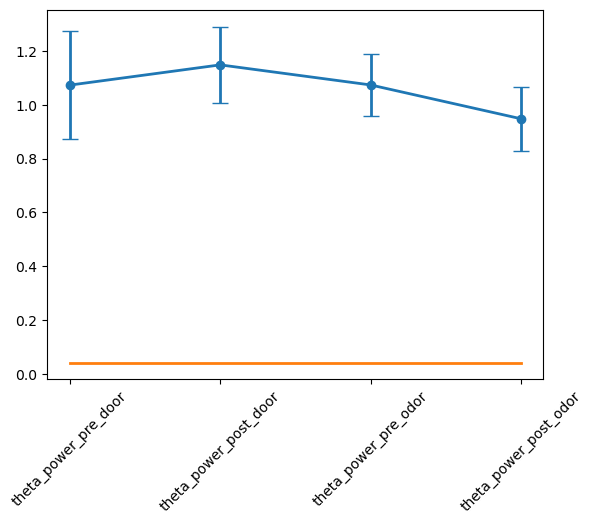

[0    3.761409
1    1.301430
2    0.720575
3    1.073839
Name: mean, dtype: float64, 0    4.263282
1    1.614542
2    0.778143
3    1.149029
Name: mean, dtype: float64, 0    3.873141
1    1.464204
2    0.663655
3    1.074432
Name: mean, dtype: float64, 0    2.736899
1    0.920706
2    0.342266
3    0.948708
Name: mean, dtype: float64, 0    3.518077
1    1.357657
2    1.032606
3    0.634386
Name: mean, dtype: float64, 0    11.682486
1     5.238082
2     2.125207
3     2.480297
Name: mean, dtype: float64, 0    7.220391
1    2.973267
2    1.525857
3    1.599730
Name: mean, dtype: float64, 0    7.114363
1    2.344004
2    0.672145
3    2.836121
Name: mean, dtype: float64, 0    8.263322
1    1.624311
2    0.442026
3    3.651953
Name: mean, dtype: float64, 0    2.165201
1    0.597369
2    0.177941
3    0.863869
Name: mean, dtype: float64, 0    2.877152
1    0.660295
2    0.210923
3    1.173122
Name: mean, dtype: float64, 0    1.732151
1    0.554128
2    0.166987
3    0.632798
Name: mean, dty

In [17]:
import matplotlib.pyplot as plt
x=[]
y=[]
theta_data=all_data[all_data['event'].str.contains('theta')]
BWcontext_theta_data=theta_data[theta_data['experiment'].str.contains('BWcontext')]
#print(BWcontext_theta_data)

fig, ax = plt.subplots()

ax.errorbar(x=BWcontext_theta_data['event'], y=BWcontext_theta_data['mean'], yerr=BWcontext_theta_data['se'], fmt='-o', linewidth=2, capsize=6)
ax.plot(BWcontext_theta_data['event'], 
        BWcontext_theta_data['first 30 seconds power'], 
        linewidth=2, label='First 30 Seconds Power')

#ax.plot(BWcontext_theta_data['event'], BWcontext_theta_data['mean'], color='blue')
ax.tick_params(axis='x', labelrotation=45)

plt.show()
for experimenti in all_experiments:
  for i,eventi in enumerate(events):
    experiment_data=all_data[(all_data['experiment']==experimenti) & (all_data['event'].str.contains(eventi))].reset_index(drop=True)    #means_data=experiment_data[experiment_data['event'].str.contains(eventi)]
    means_data=experiment_data['mean']
    #print(means_data)
    x.append(means_data)
print(x)
  #y.append(small_data['total_power_pre_door'].mean())

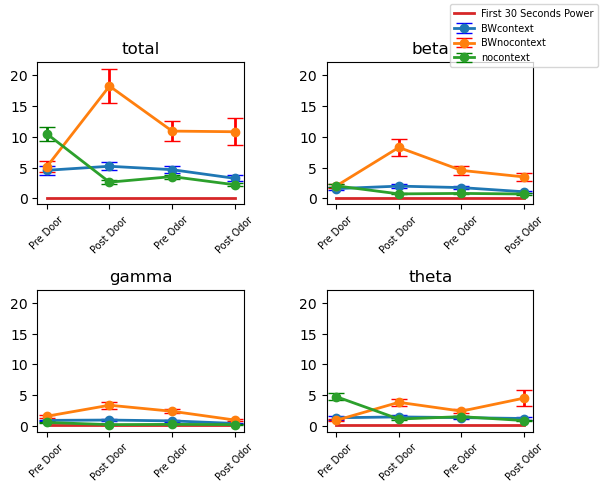

In [18]:
df=mean_data_aon
#print(df)

fig, axs=plt.subplots(2,2)
axs=axs.flatten()
xticklabels = ['Pre Door', 'Post Door', 'Pre Odor', 'Post Odor']

for i,bandi in enumerate(bands):
  data_filter1=df[df['event'].str.contains(bandi)]
  BWcontext_data=data_filter1[data_filter1['experiment']=='BWcontext']
  BWnocontext_data=data_filter1[data_filter1['experiment']=='BWnocontext']
  nocontext_data=data_filter1[data_filter1['experiment']=='nocontext']
  axs[i].errorbar(x=BWcontext_data['event'], y=BWcontext_data['mean'], yerr=BWcontext_data['se'], fmt='-o', linewidth=2, capsize=6,label='BWcontext',ecolor='blue')
  axs[i].errorbar(x=BWnocontext_data['event'], y=BWnocontext_data['mean'], yerr=BWnocontext_data['se'], fmt='-o', linewidth=2, capsize=6,label='BWnocontext',ecolor='red')
  axs[i].errorbar(x=nocontext_data['event'], y=nocontext_data['mean'], yerr=nocontext_data['se'], fmt='-o', linewidth=2, capsize=6,label='nocontext',ecolor='green')
  axs[i].plot(BWnocontext_data['event'], 
        BWnocontext_data['first 30 seconds power'], 
        linewidth=2, label='First 30 Seconds Power')
  ax=axs[i]
  ax.set_title(bandi)
  #ax.legend()
  ax.set_xticks(range(len(xticklabels)))
  ax.set_xticklabels(xticklabels)
  ax.tick_params(axis='x', labelrotation=45,labelsize=7)
#plt.tight_layout()
ymin = min([ax.get_ylim()[0] for ax in axs.flat])
ymax = max([ax.get_ylim()[1] for ax in axs.flat])
for ax in axs.flat:
    ax.set_ylim(ymin, ymax)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', prop={'size':7})
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Adjust values as needed  # Adjust 'loc' as needed
plt.show()


Plotting Power of AoN, Vhp and all channels for individual rats



['dk1' 'dk3' 'dk5' 'dk6']
dk1


C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\858704256.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_data_aon=pd.concat([mean_data_aon,row_aon])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\858704256.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_data_vhp=pd.concat([mean_data_vhp,row_vhp])


mean_data_all:
(0, 5)
mean_data_aon:
(48, 5)
mean_data_vhp:
(48, 5)
all channels
total
beta
gamma
theta
AoN channels only
total
beta
gamma
theta
vHp channels only
total
beta
gamma
theta


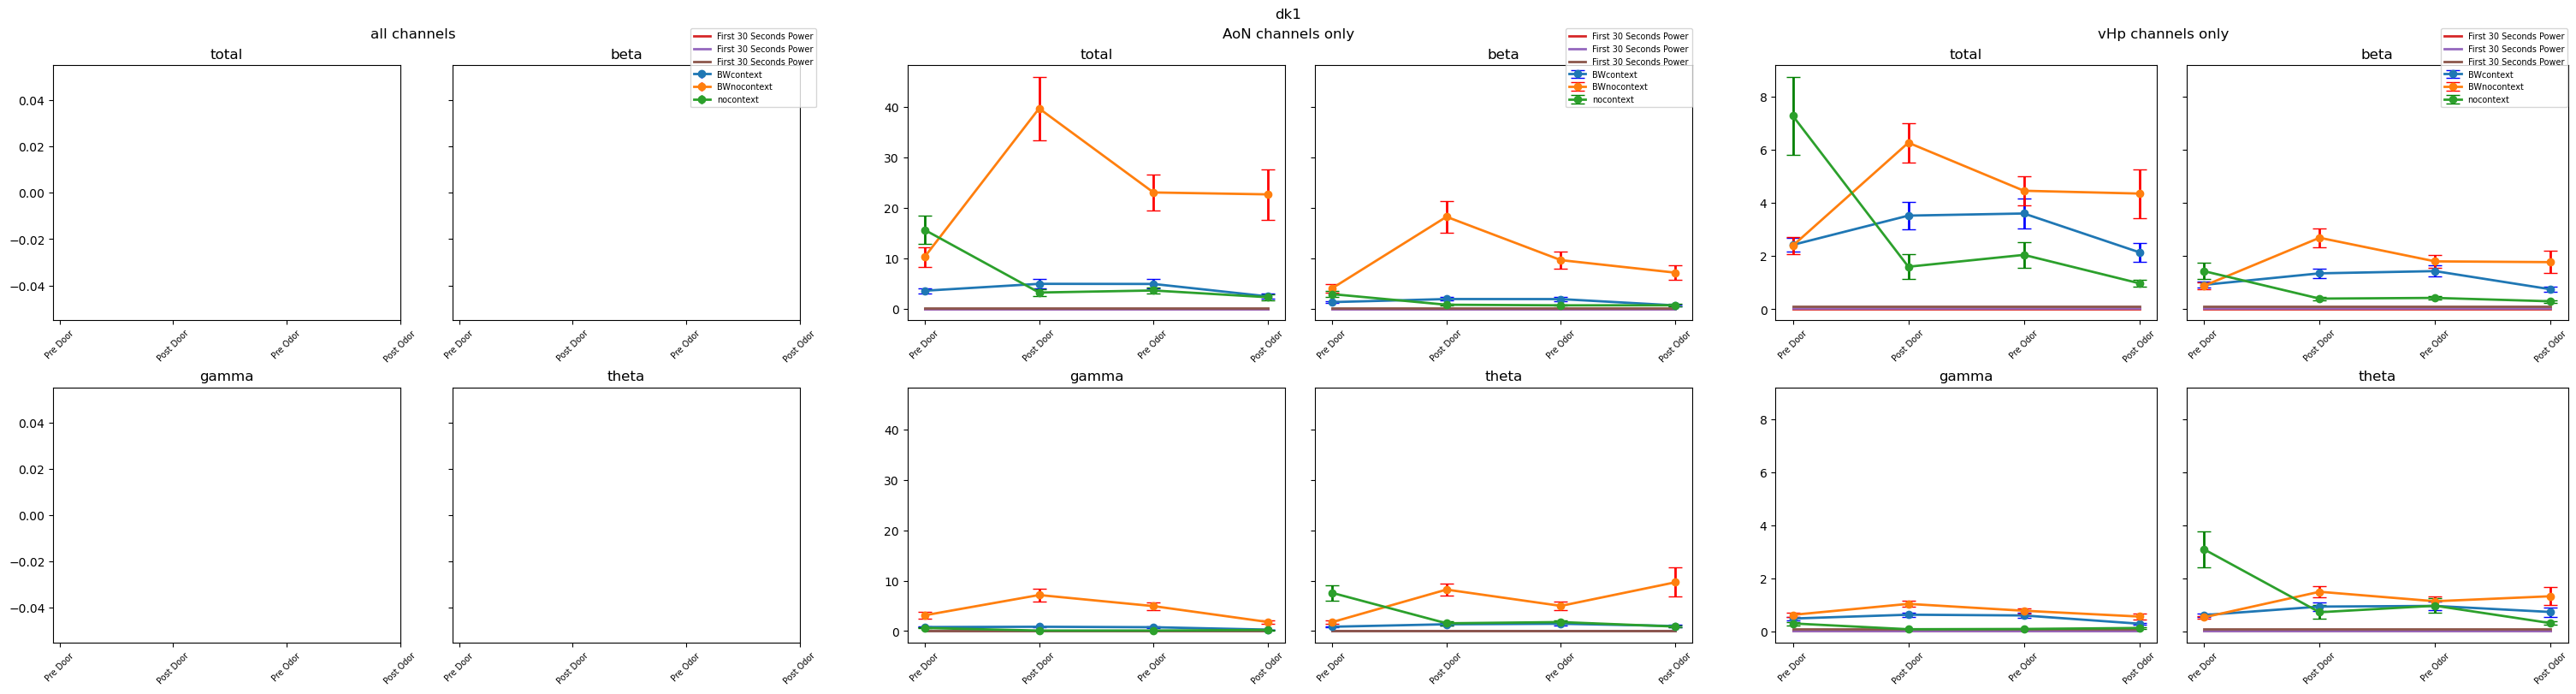

dk3
mean_data_all:
(0, 5)
mean_data_aon:
(48, 5)
mean_data_vhp:
(48, 5)
all channels
total
beta
gamma
theta


C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\858704256.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_data_aon=pd.concat([mean_data_aon,row_aon])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\858704256.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_data_vhp=pd.concat([mean_data_vhp,row_vhp])


AoN channels only
total
beta
gamma
theta
vHp channels only
total
beta
gamma
theta


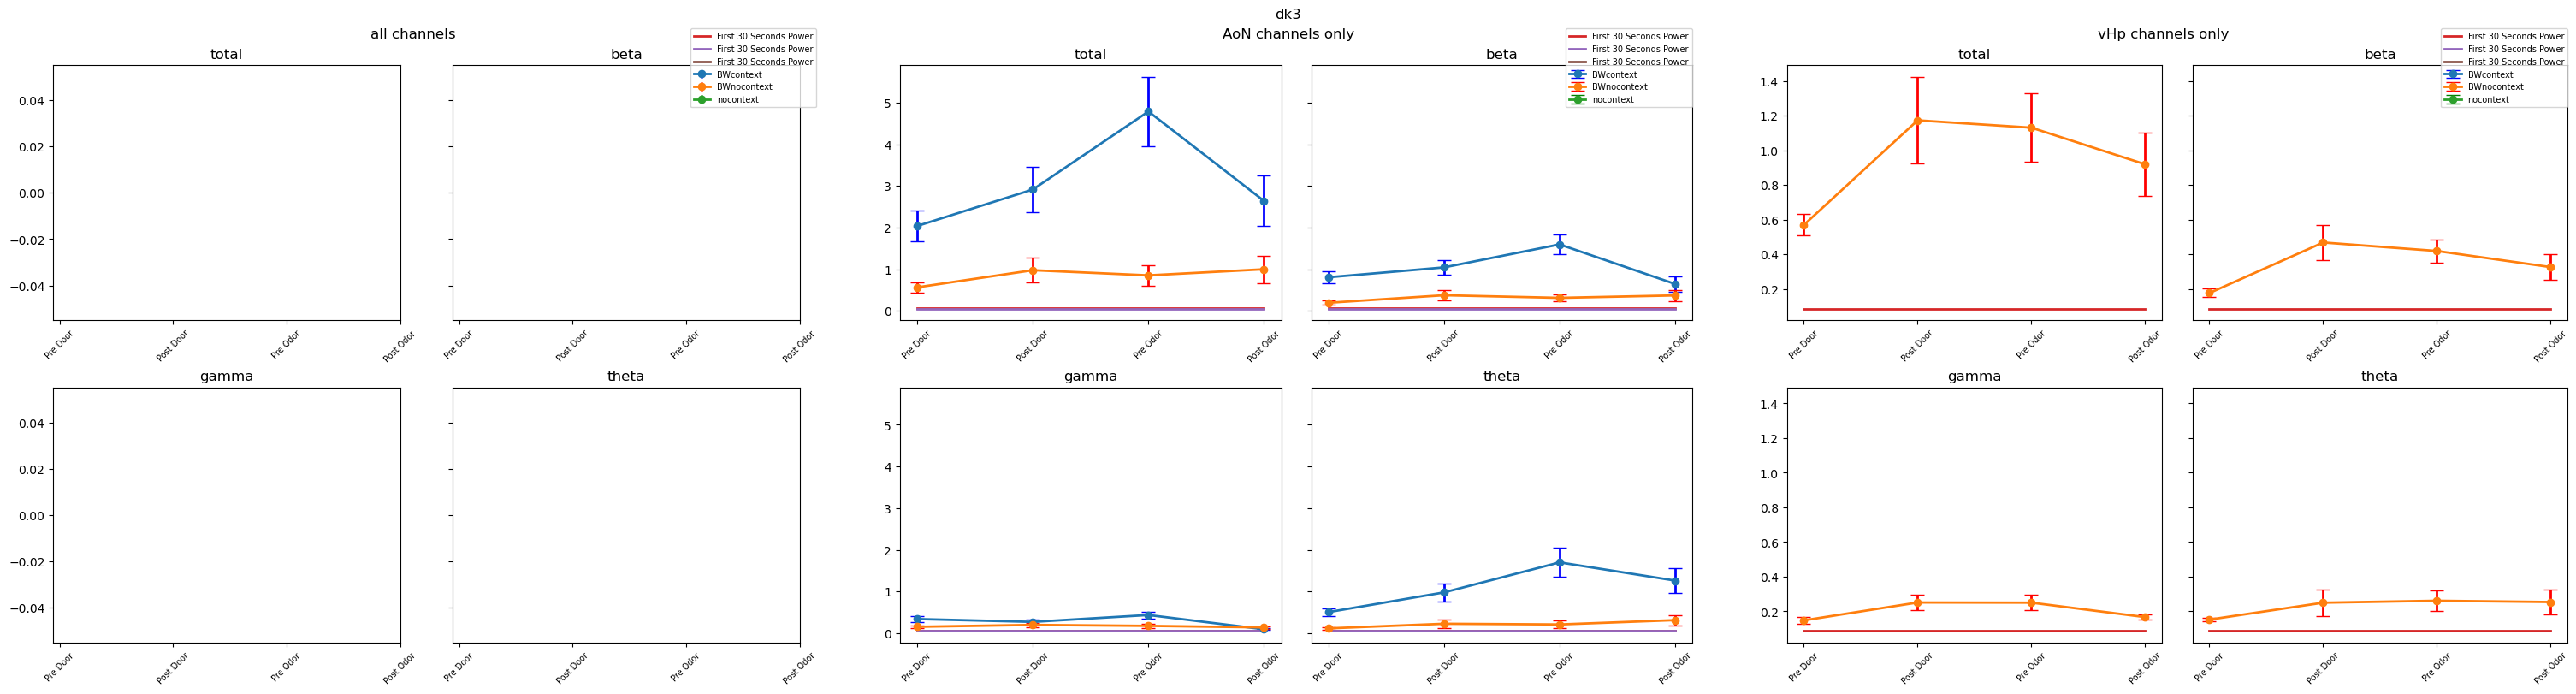

dk5
mean_data_all:
(0, 5)
mean_data_aon:
(48, 5)
mean_data_vhp:
(48, 5)
all channels
total
beta
gamma
theta
AoN channels only
total


C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\858704256.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_data_aon=pd.concat([mean_data_aon,row_aon])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\858704256.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_data_vhp=pd.concat([mean_data_vhp,row_vhp])


beta
gamma
theta
vHp channels only
total
beta
gamma
theta


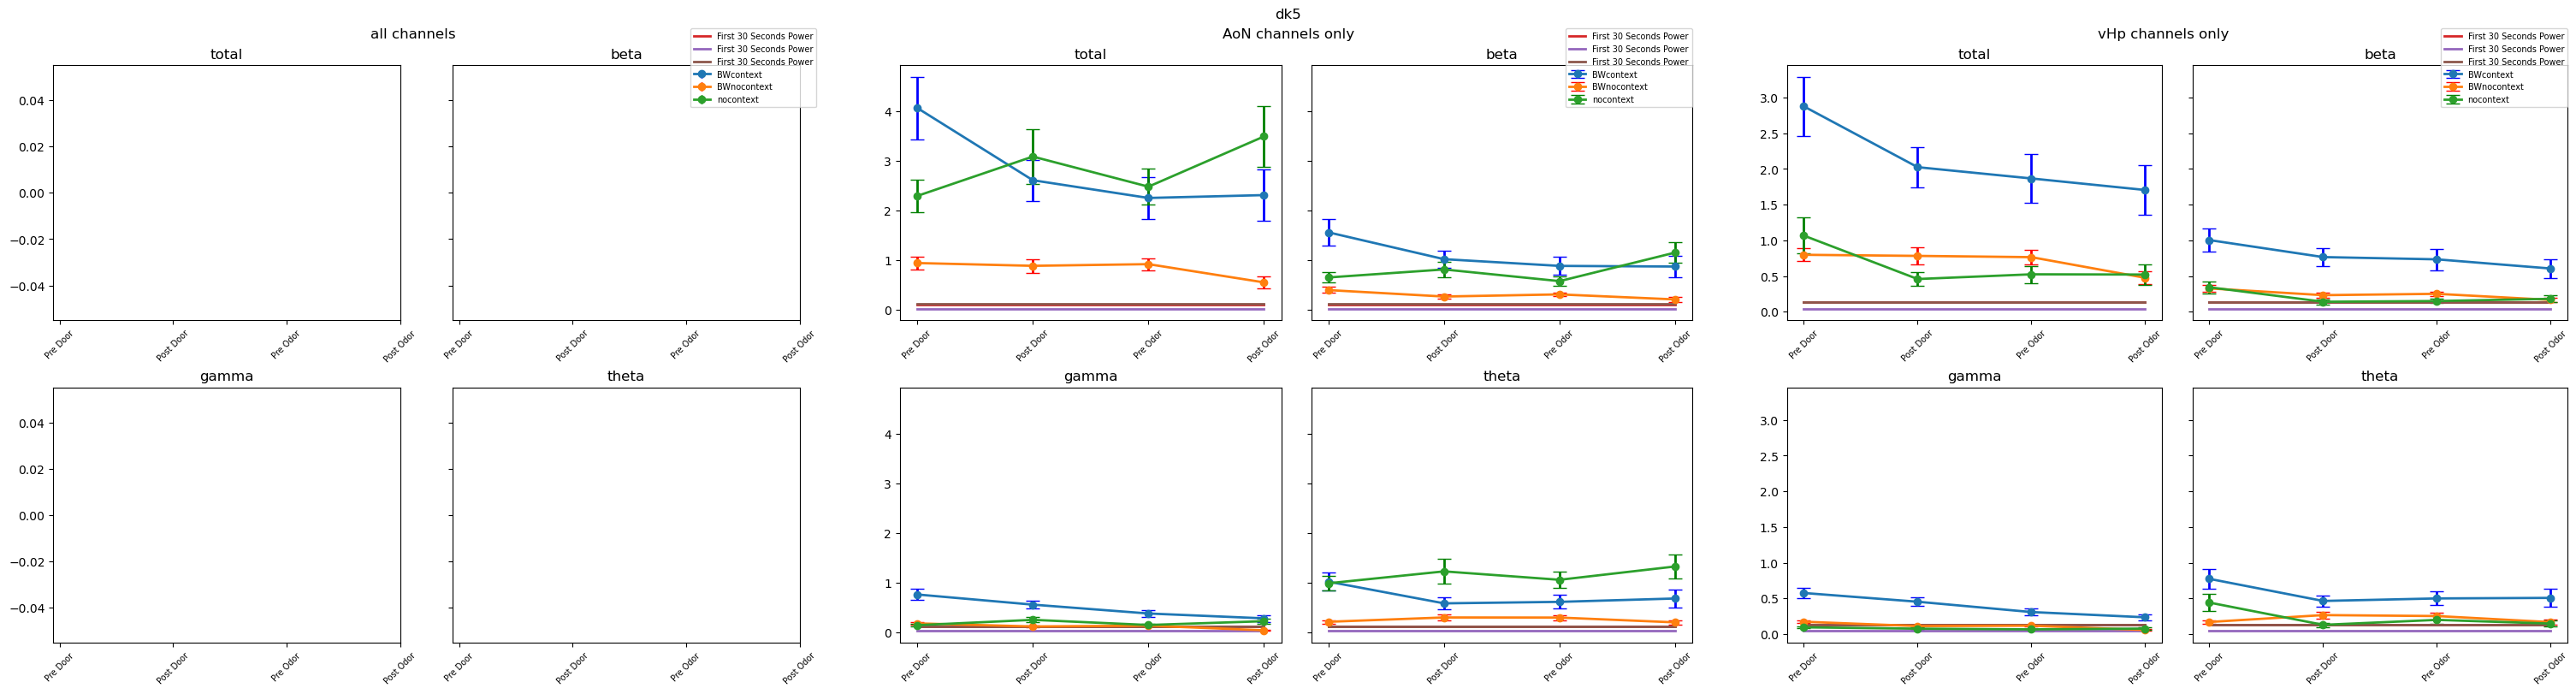

dk6
mean_data_all:
(0, 5)
mean_data_aon:
(48, 5)
mean_data_vhp:
(48, 5)
all channels


C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\858704256.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_data_aon=pd.concat([mean_data_aon,row_aon])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_39108\858704256.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_data_vhp=pd.concat([mean_data_vhp,row_vhp])


total
beta
gamma
theta
AoN channels only
total
beta
gamma
theta
vHp channels only
total
beta
gamma
theta


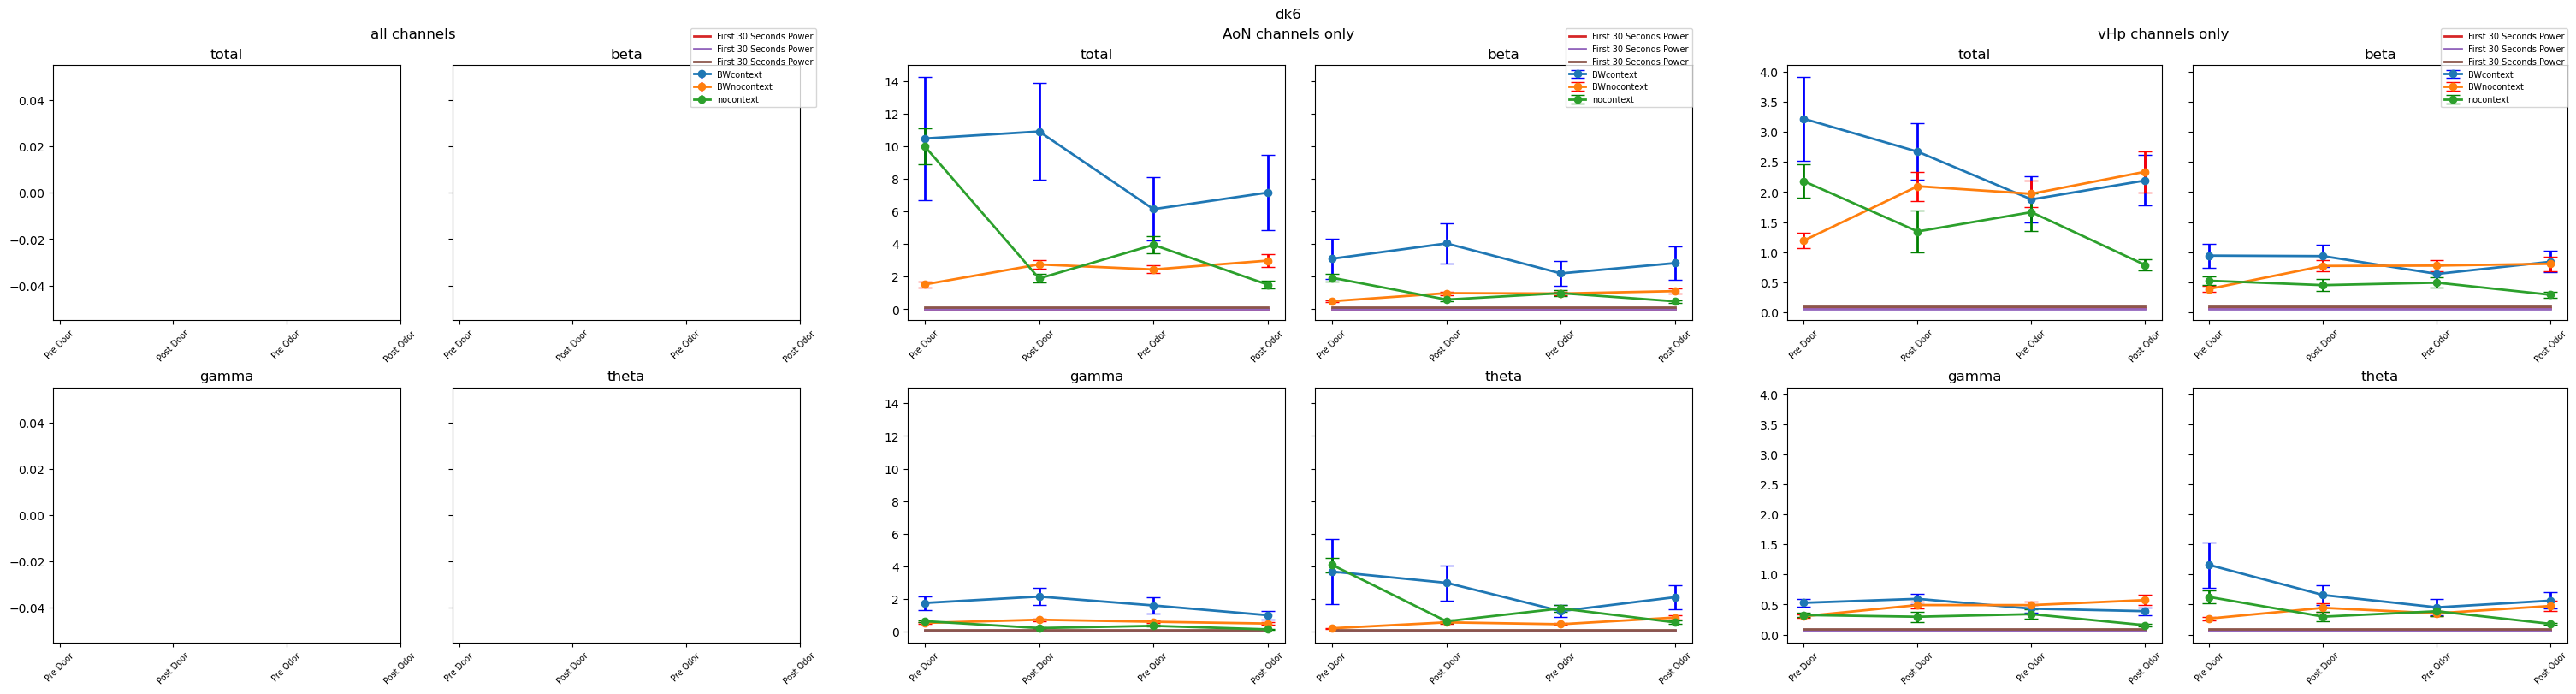

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rat_list = np.unique(compiled_data['rat'])
print(rat_list)
#rat_list = ['dk1']
bands = ['total', 'beta', 'gamma', 'theta']
events = ['_power_pre_door', '_power_post_door', '_power_pre_odor', '_power_post_odor']
aon_dict={}
vhp_dict={}
all_dict={}

for rat_i in rat_list:
    print(rat_i)
    rat_data = compiled_data[compiled_data['rat'] == rat_i]
    all_data = rat_data.copy()
    aon_data = rat_data[rat_data['channel'].str.contains('AON')]
    vhp_data = rat_data[rat_data['channel'].str.contains('vHp')]

    mean_data_all = pd.DataFrame(columns=['experiment', 'event','first 30 seconds power', 'mean', 'se'])
    mean_data_aon = pd.DataFrame(columns=['experiment', 'event', 'first 30 seconds power','mean', 'se'])
    mean_data_vhp = pd.DataFrame(columns=['experiment', 'event', 'first 30 seconds power','mean', 'se'])

    for experimenti in all_experiments:
        small_data_all = all_data[all_data['experiment'] == experimenti]
        small_data_aon = aon_data[aon_data['experiment'] == experimenti]
        small_data_vhp = vhp_data[vhp_data['experiment'] == experimenti]
        for bandi in bands:
            for eventsi in events:
                row_all=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'first 30 seconds power':[small_data['first 30 seconds power'].mean()],'mean':[small_data[bandi+eventsi].mean()],'se':[small_data[bandi+eventsi].sem()]})
                all_data=pd.concat([all_data,row_all])
                row_aon=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'first 30 seconds power':[small_data_aon['first 30 seconds power'].mean()],'mean':[small_data_aon[bandi+eventsi].mean()],'se':[small_data_aon[bandi+eventsi].sem()]})
                mean_data_aon=pd.concat([mean_data_aon,row_aon])
                row_vhp=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'first 30 seconds power':[small_data_vhp['first 30 seconds power'].mean()],'mean':[small_data_vhp[bandi+eventsi].mean()],'se':[small_data_vhp[bandi+eventsi].sem()]})
                mean_data_vhp=pd.concat([mean_data_vhp,row_vhp])
    aon_dict[rat_i]=mean_data_aon
    vhp_dict[rat_i]=mean_data_vhp
    all_dict[rat_i]=mean_data_all
    dataframes = [mean_data_all, mean_data_aon, mean_data_vhp]
    
    dataframes_names = ['all channels', 'AoN channels only', 'vHp channels only']

    # Debug prints to check the contents of the dataframes
    print("mean_data_all:")
    print(mean_data_all.shape)
    print("mean_data_aon:")
    print(mean_data_aon.shape)
    print("mean_data_vhp:")
    print(mean_data_vhp.shape)

    fig = plt.figure(layout='constrained', figsize=(30, 8))
    fig.suptitle(rat_i)

    subfigs = fig.subfigures(1, 3, wspace=0.07)

    for subfig, df_name, df in zip(subfigs, dataframes_names, dataframes):
        #subfig.set_facecolor('coral')
        subfig.suptitle(df_name)
        print(df_name)

        axs = subfig.subplots(2, 2, sharey=True).flatten()
        xticklabels = ['Pre Door', 'Post Door', 'Pre Odor', 'Post Odor']

        for i, bandi in enumerate(bands):
            print(bandi)
            data_filter1 = df[df['event'].str.contains(bandi)]
            BWcontext_data = data_filter1[data_filter1['experiment'] == 'BWcontext']
            BWnocontext_data = data_filter1[data_filter1['experiment'] == 'BWnocontext']
            nocontext_data = data_filter1[data_filter1['experiment'] == 'nocontext']
            axs[i].errorbar(x=BWcontext_data['event'], y=BWcontext_data['mean'], yerr=BWcontext_data['se'], fmt='-o', linewidth=2, capsize=6, label='BWcontext', ecolor='blue')
            axs[i].errorbar(x=BWnocontext_data['event'], y=BWnocontext_data['mean'], yerr=BWnocontext_data['se'], fmt='-o', linewidth=2, capsize=6, label='BWnocontext', ecolor='red')
            axs[i].errorbar(x=nocontext_data['event'], y=nocontext_data['mean'], yerr=nocontext_data['se'], fmt='-o', linewidth=2, capsize=6, label='nocontext', ecolor='green')
            axs[i].plot(BWnocontext_data['event'], BWnocontext_data['first 30 seconds power'], linewidth=2, label='First 30 Seconds Power')
            axs[i].plot(BWcontext_data['event'], BWcontext_data['first 30 seconds power'], linewidth=2, label='First 30 Seconds Power')
            axs[i].plot(nocontext_data['event'], nocontext_data['first 30 seconds power'], linewidth=2, label='First 30 Seconds Power')

            ax = axs[i]
            ax.set_title(bandi)
            ax.set_xticks(range(len(xticklabels)))
            ax.set_xticklabels(xticklabels)
            ax.tick_params(axis='x', labelrotation=45, labelsize=7)

        ymin = min([ax.get_ylim()[0] for ax in axs.flat])
        ymax = max([ax.get_ylim()[1] for ax in axs.flat])
        for ax in axs.flat:
            ax.set_ylim(ymin, ymax)

        handles, labels = axs[0].get_legend_handles_labels()
        subfig.legend(handles, labels, loc='upper right', prop={'size': 7})
    plt.savefig(os.path.join(savepath,f'{rat_i}_figure.png'), dpi=300, bbox_inches='tight')
    plt.show()

### Lets do a plot to compare power of different channels between rats

dk1
total
beta
gamma
theta
dk3
total
beta
gamma
theta
dk5
total
beta
gamma
theta
dk6
total
beta
gamma
theta


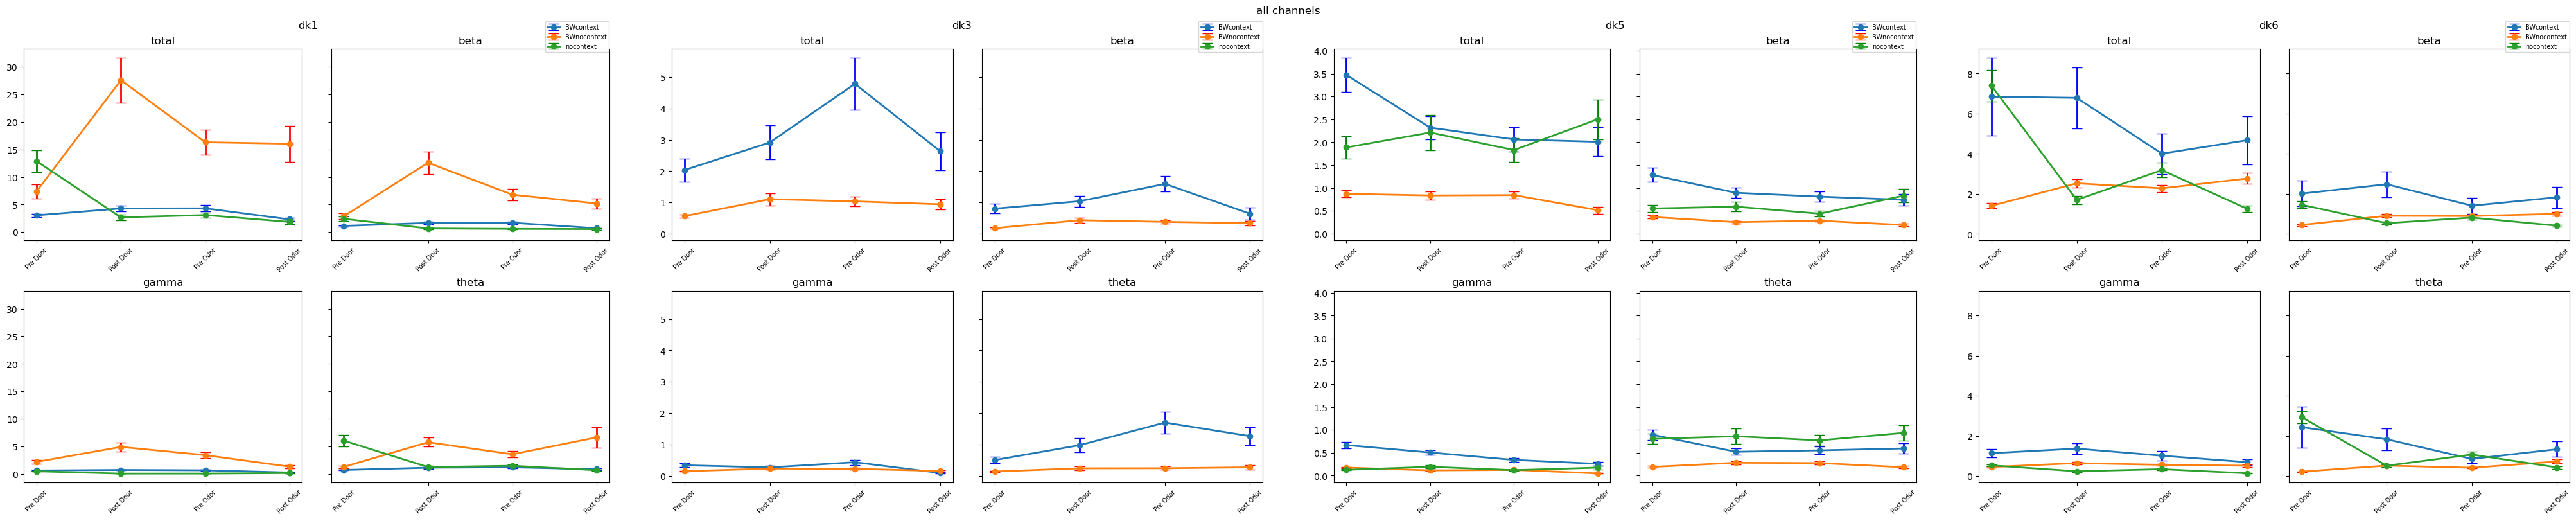

dk1
total
beta
gamma
theta
dk3
total
beta
gamma
theta
dk5
total
beta
gamma
theta
dk6
total
beta
gamma
theta


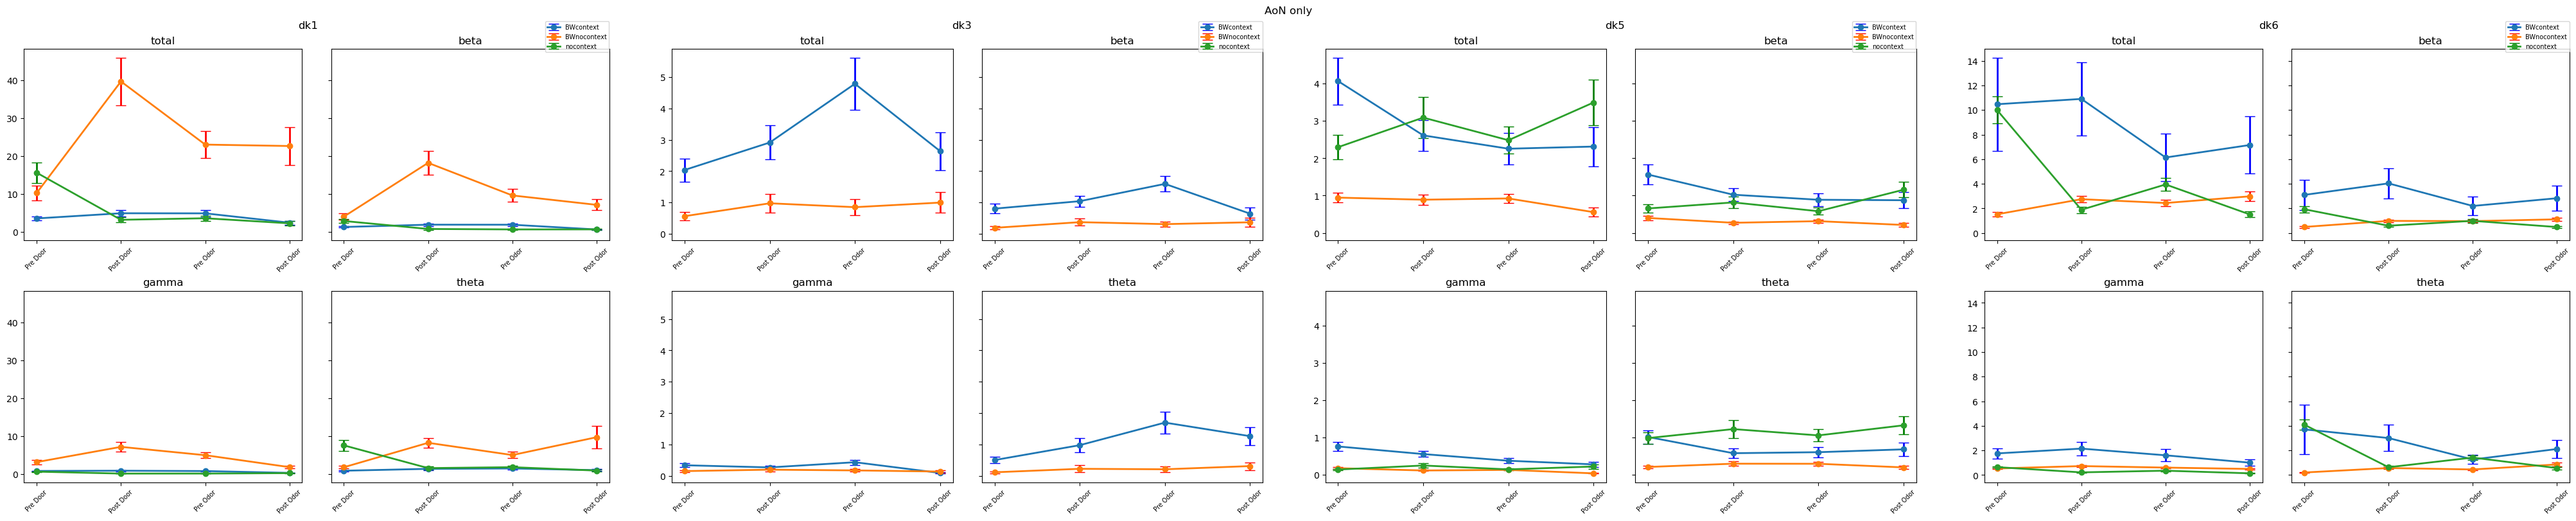

dk1
total
beta
gamma
theta
dk3
total
beta
gamma
theta
dk5
total
beta
gamma
theta
dk6
total
beta
gamma
theta


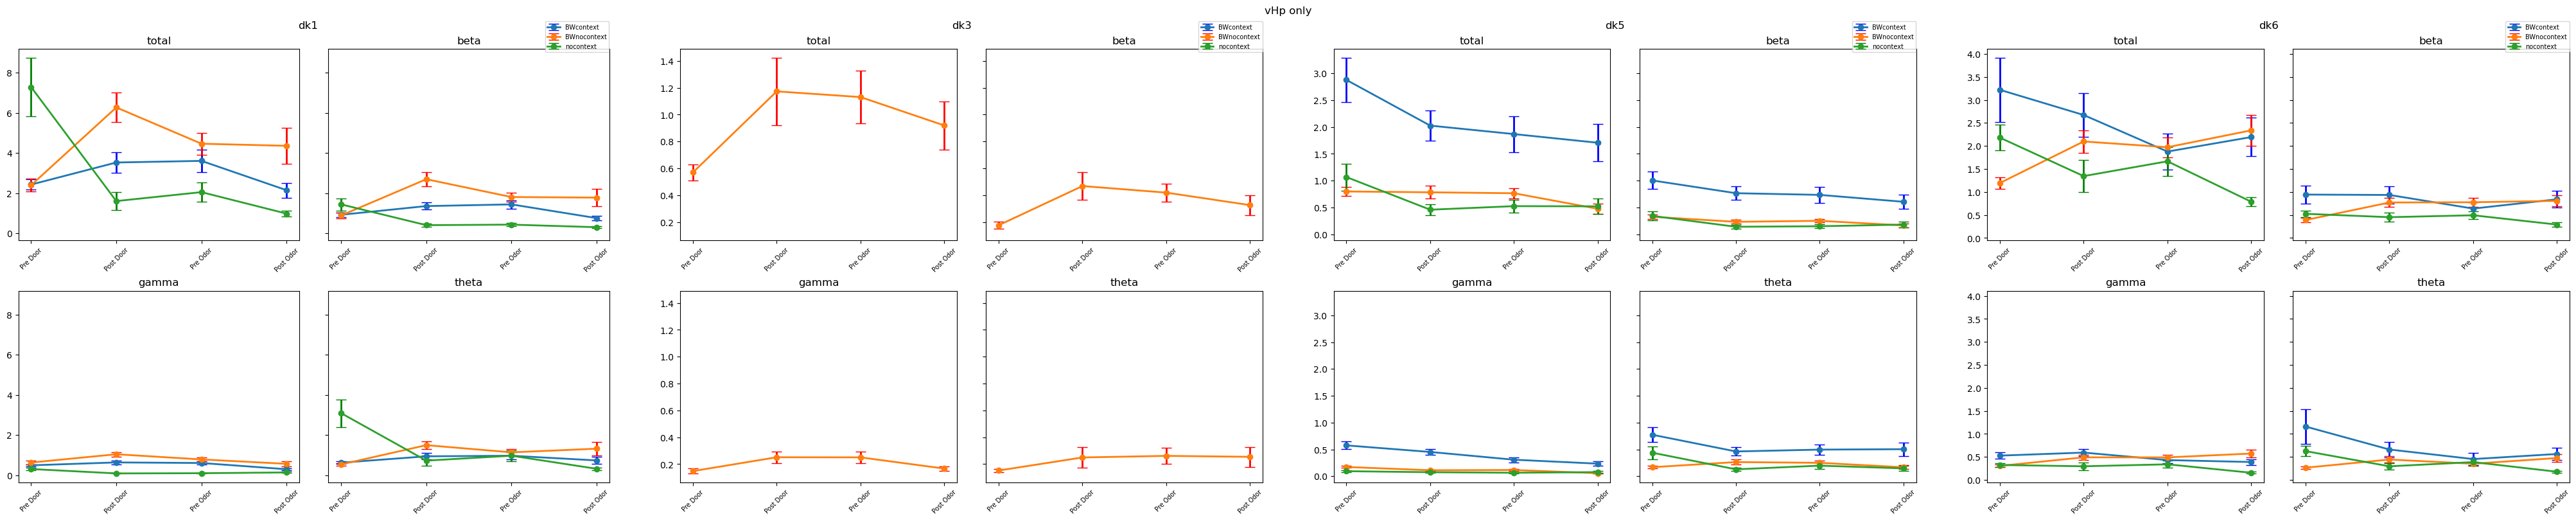

In [47]:
all_mean_dicts = {
    'all channels': all_dict,
    'AoN only': aon_dict,
    'vHp only': vhp_dict
}
for var_name, dicts in all_mean_dicts.items():
    fig = plt.figure(layout='constrained', figsize=(40, 8))
    fig.suptitle(var_name)
    subfigs = fig.subfigures(1, 4, wspace=0.07)
    for subfig, rat_name, rat_data in zip(subfigs, dicts.keys(), dicts.values()):
        #subfig.set_facecolor('coral')
        subfig.suptitle(rat_name)
        print(rat_name)

        axs = subfig.subplots(2, 2, sharey=True).flatten()
        xticklabels = ['Pre Door', 'Post Door', 'Pre Odor', 'Post Odor']

        for i, bandi in enumerate(bands):
            print(bandi)
            data_filter1 = rat_data[rat_data['event'].str.contains(bandi)]
            BWcontext_data = data_filter1[data_filter1['experiment'] == 'BWcontext']
            BWnocontext_data = data_filter1[data_filter1['experiment'] == 'BWnocontext']
            nocontext_data = data_filter1[data_filter1['experiment'] == 'nocontext']
            axs[i].errorbar(x=BWcontext_data['event'], y=BWcontext_data['mean'], yerr=BWcontext_data['se'], fmt='-o', linewidth=2, capsize=6, label='BWcontext', ecolor='blue')
            axs[i].errorbar(x=BWnocontext_data['event'], y=BWnocontext_data['mean'], yerr=BWnocontext_data['se'], fmt='-o', linewidth=2, capsize=6, label='BWnocontext', ecolor='red')
            axs[i].errorbar(x=nocontext_data['event'], y=nocontext_data['mean'], yerr=nocontext_data['se'], fmt='-o', linewidth=2, capsize=6, label='nocontext', ecolor='green')
            ax = axs[i]
            ax.set_title(bandi)
            ax.set_xticks(range(len(xticklabels)))
            ax.set_xticklabels(xticklabels)
            ax.tick_params(axis='x', labelrotation=45, labelsize=7)

        ymin = min([ax.get_ylim()[0] for ax in axs.flat])
        ymax = max([ax.get_ylim()[1] for ax in axs.flat])
        for ax in axs.flat:
            ax.set_ylim(ymin, ymax)

        handles, labels = axs[0].get_legend_handles_labels()
        subfig.legend(handles, labels, loc='upper right', prop={'size': 7})
    #plt.savefig(f'{var_name}_figure.png', dpi=300, bbox_inches='tight')
    plt.show()

dk1
total
beta
gamma
theta
dk3
total
beta
gamma
theta
dk5
total
beta
gamma
theta
dk6
total
beta
gamma
theta


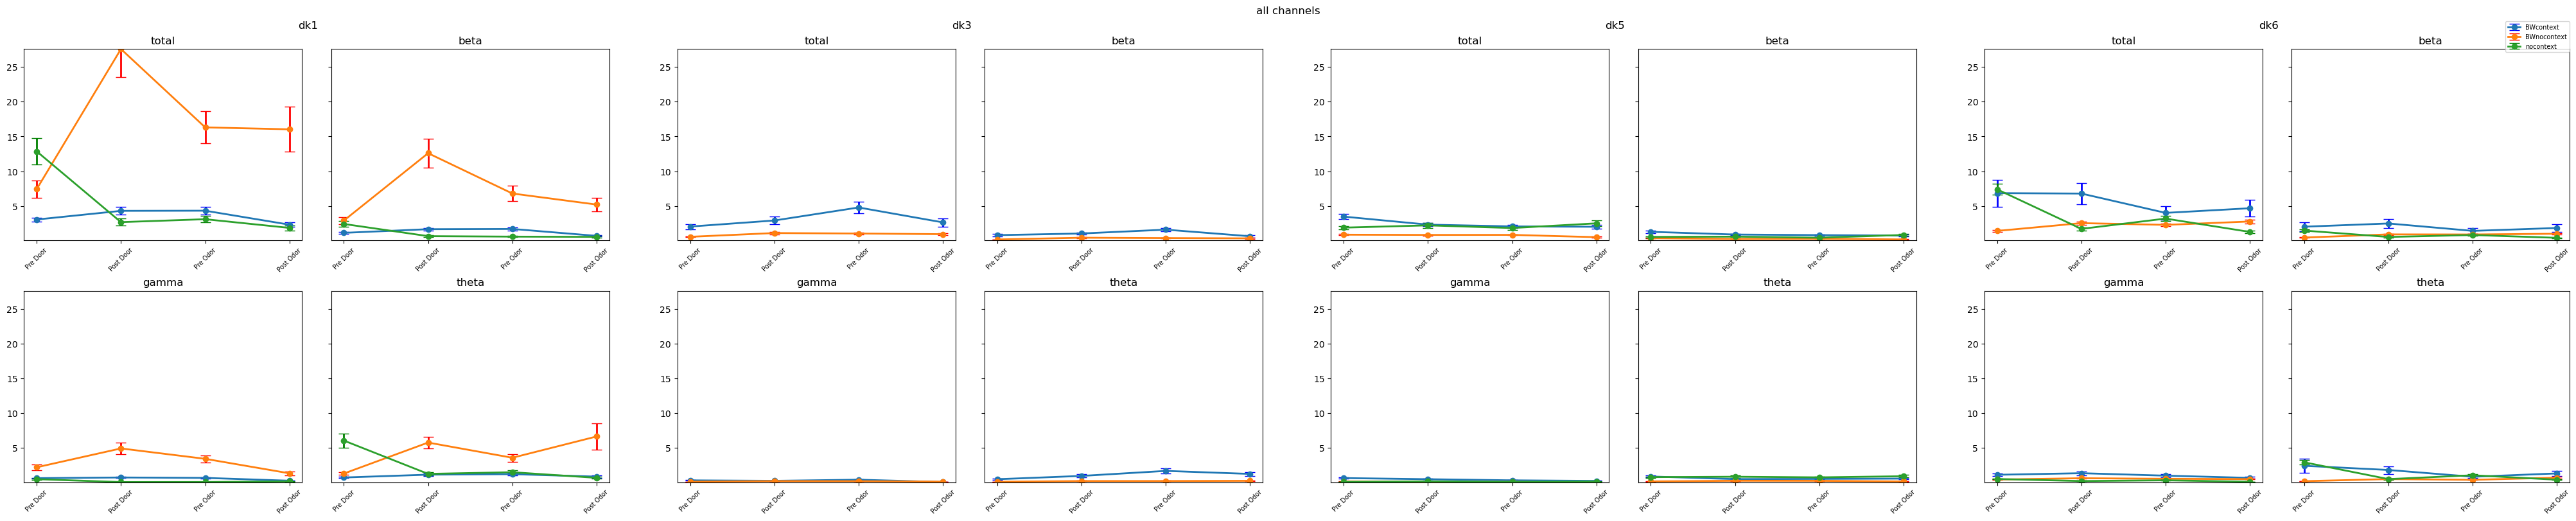

dk1
total
beta
gamma
theta
dk3
total
beta
gamma
theta
dk5
total
beta
gamma
theta
dk6
total
beta
gamma
theta


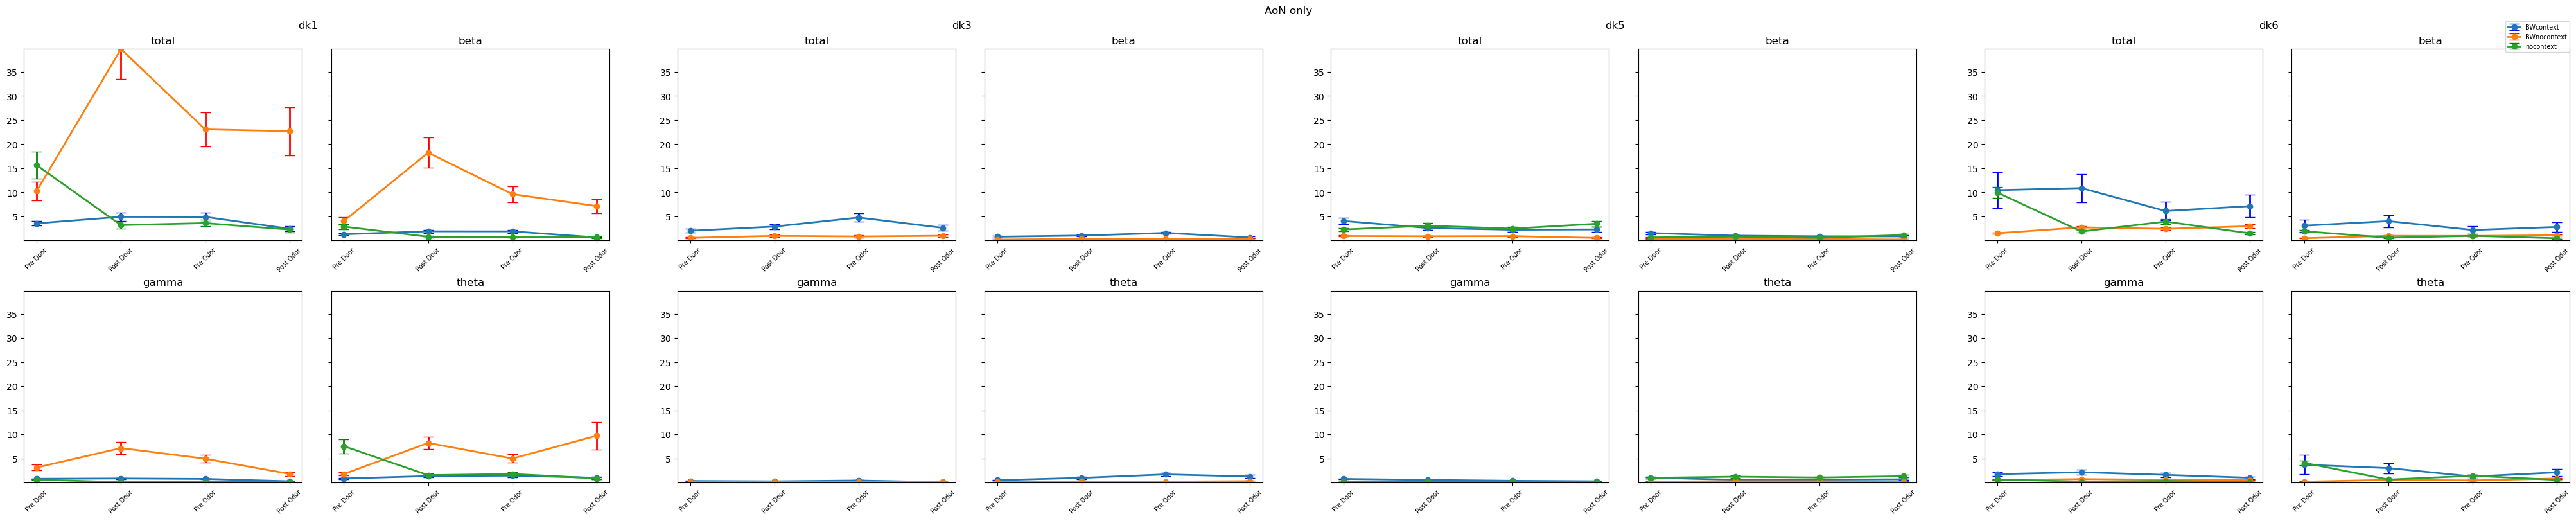

dk1
total
beta
gamma
theta
dk3
total
beta
gamma
theta
dk5
total
beta
gamma
theta
dk6
total
beta
gamma
theta


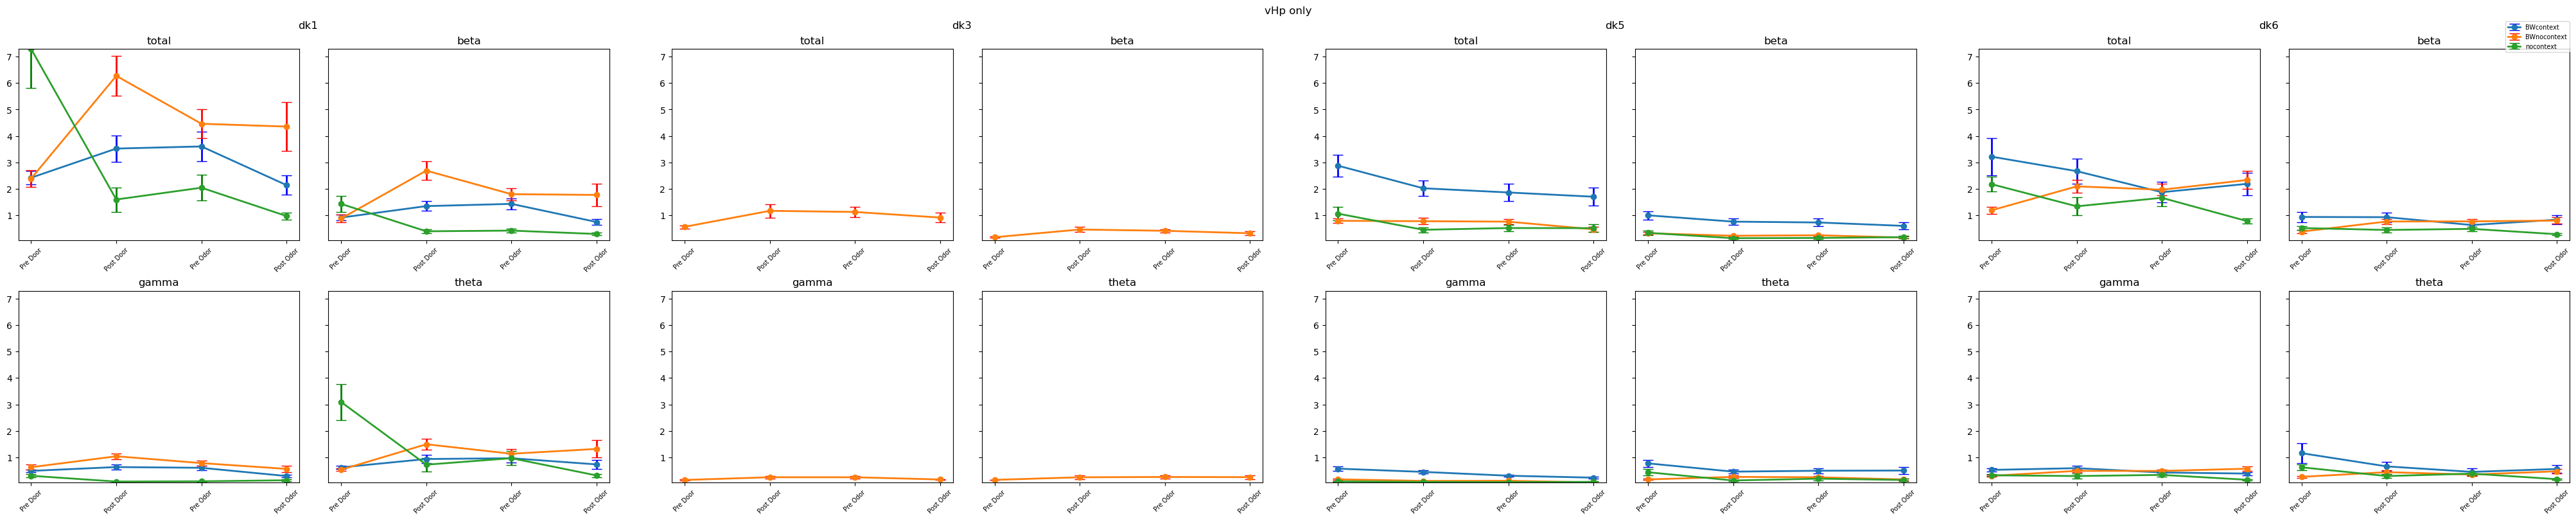

In [48]:
import matplotlib.pyplot as plt
import re

all_mean_dicts = {
    'all channels': all_dict,
    'AoN only': aon_dict,
    'vHp only': vhp_dict
}

for var_name, dicts in all_mean_dicts.items():
    fig = plt.figure(layout='constrained', figsize=(40, 8))
    fig.suptitle(var_name)
    subfigs = fig.subfigures(1, 4, wspace=0.07)
    all_y_values = []

    for subfig, rat_name, rat_data in zip(subfigs, dicts.keys(), dicts.values()):
        #subfig.set_facecolor('coral')
        subfig.suptitle(rat_name)
        print(rat_name)

        axs = subfig.subplots(2, 2, sharey=True).flatten()
        xticklabels = ['Pre Door', 'Post Door', 'Pre Odor', 'Post Odor']

        for i, bandi in enumerate(bands):
            print(bandi)
            data_filter1 = rat_data[rat_data['event'].str.contains(bandi)]
            BWcontext_data = data_filter1[data_filter1['experiment'] == 'BWcontext']
            BWnocontext_data = data_filter1[data_filter1['experiment'] == 'BWnocontext']
            nocontext_data = data_filter1[data_filter1['experiment'] == 'nocontext']
            axs[i].errorbar(x=BWcontext_data['event'], y=BWcontext_data['mean'], yerr=BWcontext_data['se'], fmt='-o', linewidth=2, capsize=6, label='BWcontext', ecolor='blue')
            axs[i].errorbar(x=BWnocontext_data['event'], y=BWnocontext_data['mean'], yerr=BWnocontext_data['se'], fmt='-o', linewidth=2, capsize=6, label='BWnocontext', ecolor='red')
            axs[i].errorbar(x=nocontext_data['event'], y=nocontext_data['mean'], yerr=nocontext_data['se'], fmt='-o', linewidth=2, capsize=6, label='nocontext', ecolor='green')
            ax = axs[i]
            ax.set_title(bandi)
            ax.set_xticks(range(len(xticklabels)))
            ax.set_xticklabels(xticklabels)
            ax.tick_params(axis='x', labelrotation=45, labelsize=7)

            # Collect all y-values
            all_y_values.extend(BWcontext_data['mean'])
            all_y_values.extend(BWnocontext_data['mean'])
            all_y_values.extend(nocontext_data['mean'])

    # Determine global y-axis limits
    ymin = min(all_y_values)
    ymax = max(all_y_values)

    # Set y-axis limits for all subplots
    for subfig in subfigs:
        for ax in subfig.axes:
            ax.set_ylim(ymin, ymax)

    handles, labels = axs[0].get_legend_handles_labels()
    subfig.legend(handles, labels, loc='upper right', prop={'size': 7})

    #plt.savefig(f'{var_name}_figure_sharey.png', dpi=300, bbox_inches='tight')
    plt.show()

### Plotting power for correct and incorrect digs

In [13]:
bands=['total','beta','gamma','theta']
events=['_power_pre_door','_power_post_door','_power_pre_odor','_power_post_odor']

aon_data=compiled_data[compiled_data['channel'].str.contains('AON')]
vhp_data=compiled_data[compiled_data['channel'].str.contains('vHp')]

all_data_correct=pd.DataFrame(columns=['experiment','event','mean','se'])
all_data_incorrect=pd.DataFrame(columns=['experiment','event','mean','se'])

mean_data_aon_correct=pd.DataFrame(columns=['experiment','event','mean','se'])
mean_data_vhp_correct=pd.DataFrame(columns=['experiment','event','mean','se'])
mean_data_aon_incorrect=pd.DataFrame(columns=['experiment','event','mean','se'])
mean_data_vhp_incorrect=pd.DataFrame(columns=['experiment','event','mean','se'])

total_dict={}
beta_dict={}
gamma_dict={}
theta_dict={}
for experimenti in all_experiments:
  small_data_correct=compiled_data[(compiled_data['experiment']==experimenti) & (compiled_data['correct?']==1)]
  small_data_aon_correct=aon_data[(aon_data['experiment']==experimenti) & (aon_data['correct?']==1)]
  small_data_vhp_correct=vhp_data[(vhp_data['experiment']==experimenti) & (vhp_data['correct?']==1)]
  small_data_incorrect=compiled_data[(compiled_data['experiment']==experimenti) & (compiled_data['correct?']==0)]
  small_data_aon_incorrect=aon_data[(aon_data['experiment']==experimenti) & (aon_data['correct?']==0)]
  small_data_vhp_incorrect=vhp_data[(vhp_data['experiment']==experimenti) & (vhp_data['correct?']==0)]
  for bandi in bands:
    mean_list=[]
    sem_list=[]
    for eventsi in events:
      
      row_all_correct=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'mean':[small_data_correct[bandi+eventsi].mean()],'se':[small_data_correct[bandi+eventsi].sem()]})
      all_data_correct=pd.concat([all_data_correct,row_all_correct])
      
      row_aon_correct=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'mean':[small_data_aon_correct[bandi+eventsi].mean()],'se':[small_data_aon_correct[bandi+eventsi].sem()]})
      mean_data_aon_correct=pd.concat([mean_data_aon_correct,row_aon_correct])
      
      row_vhp_correct=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'mean':[small_data_vhp_correct[bandi+eventsi].mean()],'se':[small_data_vhp_correct[bandi+eventsi].sem()]})
      mean_data_vhp_correct=pd.concat([mean_data_vhp_correct,row_vhp_correct])
      
      row_all_incorrect=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'mean':[small_data_incorrect[bandi+eventsi].mean()],'se':[small_data_incorrect[bandi+eventsi].sem()]})
      all_data_incorrect=pd.concat([all_data_incorrect,row_all_incorrect])
      
      row_aon_incorrect=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'mean':[small_data_aon_incorrect[bandi+eventsi].mean()],'se':[small_data_aon_incorrect[bandi+eventsi].sem()]})
      mean_data_aon_incorrect=pd.concat([mean_data_aon_incorrect,row_aon_incorrect])
      
      row_vhp_incorrect=pd.DataFrame({'experiment':[experimenti],'event':[bandi+eventsi],'mean':[small_data_vhp_incorrect[bandi+eventsi].mean()],'se':[small_data_vhp_incorrect[bandi+eventsi].sem()]})
      mean_data_vhp_incorrect=pd.concat([mean_data_vhp_incorrect,row_vhp_incorrect])
#print(all_data)

C:\Users\sinha\AppData\Local\Temp\ipykernel_39200\3450635280.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data_correct=pd.concat([all_data_correct,row_all_correct])
C:\Users\sinha\AppData\Local\Temp\ipykernel_39200\3450635280.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_data_aon_correct=pd.concat([mean_data_aon_correct,row_aon_correct])
C:\Users\sinha\AppData\Local\Temp\ipykernel_39200\3450635280.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or

In [ ]:
df=mean_data_aon
#print(df)

fig, axs=plt.subplots(2,2)
axs=axs.flatten()
xticklabels = ['Pre Door', 'Post Door', 'Pre Odor', 'Post Odor']

for i,bandi in enumerate(bands):
  data_filter1=df[df['event'].str.contains(bandi)]
  BWcontext_data=data_filter1[data_filter1['experiment']=='BWcontext']
  BWnocontext_data=data_filter1[data_filter1['experiment']=='BWnocontext']
  nocontext_data=data_filter1[data_filter1['experiment']=='nocontext']
  axs[i].errorbar(x=BWcontext_data['event'], y=BWcontext_data['mean'], yerr=BWcontext_data['se'], fmt='-o', linewidth=2, capsize=6,label='BWcontext',ecolor='blue')
  axs[i].errorbar(x=BWnocontext_data['event'], y=BWnocontext_data['mean'], yerr=BWnocontext_data['se'], fmt='-o', linewidth=2, capsize=6,label='BWnocontext',ecolor='red')
  axs[i].errorbar(x=nocontext_data['event'], y=nocontext_data['mean'], yerr=nocontext_data['se'], fmt='-o', linewidth=2, capsize=6,label='nocontext',ecolor='green')
  ax=axs[i]
  ax.set_title(bandi)
  #ax.legend()
  ax.set_xticks(range(len(xticklabels)))
  ax.set_xticklabels(xticklabels)
  ax.tick_params(axis='x', labelrotation=45,labelsize=7)
#plt.tight_layout()
ymin = min([ax.get_ylim()[0] for ax in axs.flat])
ymax = max([ax.get_ylim()[1] for ax in axs.flat])
for ax in axs.flat:
    ax.set_ylim(ymin, ymax)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', prop={'size':7})
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Adjust values as needed  # Adjust 'loc' as needed
plt.show()


In [ ]:
# prompt: plot total_power_pre_door, post_door, pre_odor, and post_odor, for BWcontext, BWnocontext, and nocontext

import matplotlib.pyplot as plt

# Group data by experiment and phase
grouped_data = compiled_data.groupby(['experiment', 'phase'])

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Plot data for each experiment and phase
for i, experiment in enumerate(['BWcontext', 'BWnocontext', 'nocontext']):
  for j, phase in enumerate(['total_power_pre_door', 'total_power_post_door', 'total_power_pre_odor', 'total_power_post_odor']):
    data = grouped_data.get_group((experiment, phase))
    axes[i, j].hist(data['value'], bins=10)
    axes[i, j].set_title(f"{experiment} - {phase}")
    axes[i, j].set_xlabel('Power')
    axes[i, j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
